In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
#Read Churn Dataset and get summary of basic statistics
df=pd.read_csv('Churn_Modelling 2.csv')
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


### Before Remove Outliers

In [3]:
#Remove columns not needed for analysis
df=df.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1)
df

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [4]:
#Encoded Gender
df['Gender']=df['Gender'].apply(lambda x: 1 if x == 'Male' else 0)
df

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,0,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,0,41,1,83807.86,1,0,1,112542.58,0
2,502,France,0,42,8,159660.80,3,1,0,113931.57,1
3,699,France,0,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,0,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,1,39,5,0.00,2,1,0,96270.64,0
9996,516,France,1,35,10,57369.61,1,1,1,101699.77,0
9997,709,France,0,36,7,0.00,1,0,1,42085.58,1
9998,772,Germany,1,42,3,75075.31,2,1,0,92888.52,1


In [5]:
clist= [df['CreditScore'],df['Age'],df['Tenure'],df['Balance'],df['NumOfProducts'],df['EstimatedSalary']]

{'whiskers': [<matplotlib.lines.Line2D at 0x221065f2700>,
 'caps': [<matplotlib.lines.Line2D at 0x221065f2c40>,
 'boxes': [<matplotlib.lines.Line2D at 0x221065f2460>],
 'medians': [<matplotlib.lines.Line2D at 0x221066101c0>],
 'fliers': [<matplotlib.lines.Line2D at 0x22106610460>],
 'means': []}

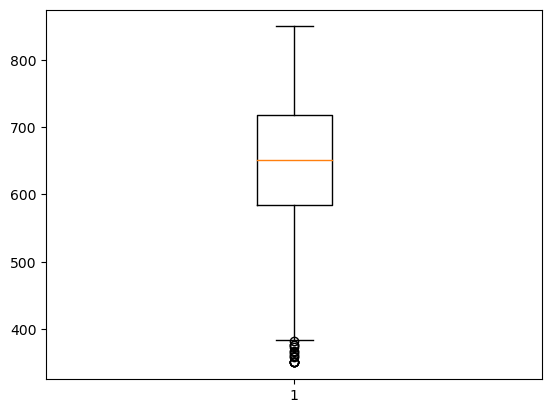

In [6]:
#Credit Score Boxplot
plt.boxplot(clist[0])

{'whiskers': [<matplotlib.lines.Line2D at 0x221066b9a60>,
 'caps': [<matplotlib.lines.Line2D at 0x221066b9fa0>,
 'boxes': [<matplotlib.lines.Line2D at 0x221066b9820>],
 'medians': [<matplotlib.lines.Line2D at 0x221066c9160>],
 'fliers': [<matplotlib.lines.Line2D at 0x221066c94f0>],
 'means': []}

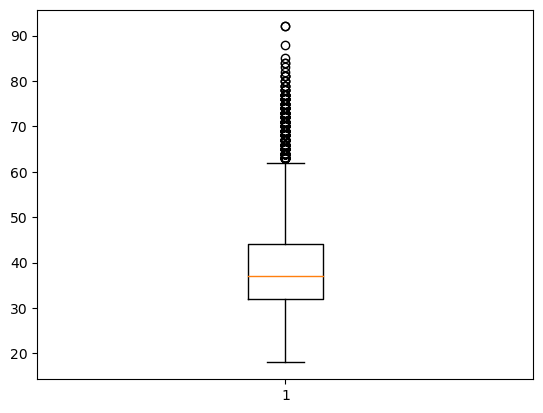

In [7]:
#Age Boxplot
plt.boxplot(clist[1])

{'whiskers': [<matplotlib.lines.Line2D at 0x22106730d60>,
 'caps': [<matplotlib.lines.Line2D at 0x22106741310>,
 'boxes': [<matplotlib.lines.Line2D at 0x22106730be0>],
 'medians': [<matplotlib.lines.Line2D at 0x22106741850>],
 'fliers': [<matplotlib.lines.Line2D at 0x22106741af0>],
 'means': []}

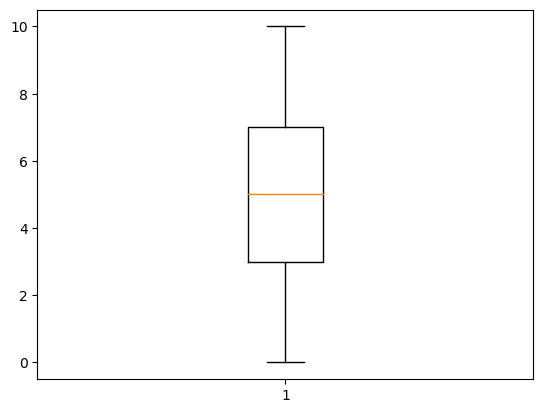

In [8]:
#Tenure Boxplot
plt.boxplot(clist[2])

{'whiskers': [<matplotlib.lines.Line2D at 0x221067ac070>,
 'caps': [<matplotlib.lines.Line2D at 0x2210674e910>,
 'boxes': [<matplotlib.lines.Line2D at 0x2210679fd90>],
 'medians': [<matplotlib.lines.Line2D at 0x221067ac2e0>],
 'fliers': [<matplotlib.lines.Line2D at 0x221067ac640>],
 'means': []}

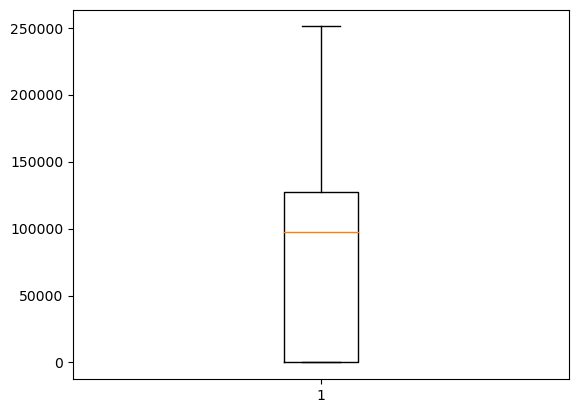

In [9]:
#Balance Boxplot
plt.boxplot(clist[3])

{'whiskers': [<matplotlib.lines.Line2D at 0x221069de700>,
 'caps': [<matplotlib.lines.Line2D at 0x221069deb20>,
 'boxes': [<matplotlib.lines.Line2D at 0x221069de460>],
 'medians': [<matplotlib.lines.Line2D at 0x2210686a0a0>],
 'fliers': [<matplotlib.lines.Line2D at 0x2210686a340>],
 'means': []}

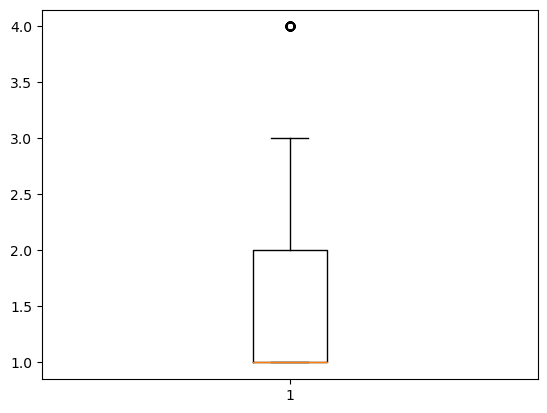

In [10]:
#Num of Products Boxplot
plt.boxplot(clist[4])

{'whiskers': [<matplotlib.lines.Line2D at 0x221068b6d30>,
 'caps': [<matplotlib.lines.Line2D at 0x221068d40a0>,
 'boxes': [<matplotlib.lines.Line2D at 0x221068c6f70>],
 'medians': [<matplotlib.lines.Line2D at 0x221068d4730>],
 'fliers': [<matplotlib.lines.Line2D at 0x221068d49d0>],
 'means': []}

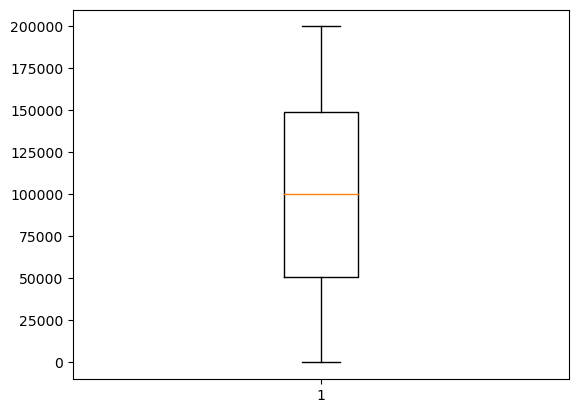

In [11]:
#Estimated Salary Boxplot
plt.boxplot(clist[5])

In [12]:
#Before removing Credit Score outliers, find if Gender impacts Credit Score with significantly different mean using T-test 
from scipy.stats import ttest_ind
tset, gender_pval = ttest_ind(df['CreditScore'], df['Gender'])
print(gender_pval)

0.0


In [13]:
#Identify if Credit Scores impacts wheter customer exited with significantly different means using T-test
tset, csexited_pval = ttest_ind(df['CreditScore'], df['Exited'])
print(csexited_pval)

0.0


In [14]:
#Identify if Age impacts wheter customer exited with significantly different means using T-test
tset, ageexited_pval = ttest_ind(df['Age'], df['Exited'])
print(ageexited_pval)

0.0


In [15]:
#Identify if Tenure impacts wheter customer exited with significantly different means using T-test
tset, texited_pval = ttest_ind(df['Tenure'], df['Exited'])
print(texited_pval)

0.0


In [16]:
#Identify if Balance impacts wheter customer exited with significantly different means using T-test
tset, bexited_pval = ttest_ind(df['Balance'], df['Exited'])
print(bexited_pval)

0.0


In [17]:
#Identify if number of products impacts wheter customer exited with significantly different means using T-test
tset, numprdexited_pval = ttest_ind(df['NumOfProducts'], df['Exited'])
print(numprdexited_pval)

0.0


In [18]:
#Identify if estimated salary impacts wheter customer exited with significantly different means using T-test
tset, esexited_pval = ttest_ind(df['EstimatedSalary'], df['Exited'])
print(esexited_pval)

0.0


### Random Forest Classifier - Before Credit Score Outliers Removal

In [19]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd

In [20]:
from pathlib import Path
from collections import Counter

from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import confusion_matrix
from imblearn.metrics import classification_report_imbalanced

In [21]:
#Create Features
X_b = pd.get_dummies(df, columns=['Geography'])
X_b = X_b.drop(["Exited"], axis=1)

# Create our target
y_b = df["Exited"]

In [22]:
X_b.describe()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,650.528800,0.545700,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.501400,0.250900,0.247700
std,96.653299,0.497932,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.500023,0.433553,0.431698
min,350.000000,0.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000,0.000000,0.000000
25%,584.000000,0.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000,0.000000,0.000000
50%,652.000000,1.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,1.000000,0.000000,0.000000
75%,718.000000,1.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,1.000000,1.000000,0.000000
max,850.000000,1.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000,1.000000,1.000000


In [23]:
# Check the balance of our target values
y_b.value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

In [27]:
from sklearn.model_selection import train_test_split

X_b_train, X_b_test, y_b_train, y_b_test = train_test_split(X_b, y_b, random_state=42)
Counter(y_b_train)

Counter({1: 1540, 0: 5960})

In [28]:
# Model fit for resampling training data with the BalancedRandomForestClassifier
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=100, random_state=1)
model = model.fit(X_b_train, y_b_train)

In [29]:
# Calculated the balanced accuracy score
from sklearn.metrics import balanced_accuracy_score

y_b_pred = model.predict(X_b_test)
print(f'RFC balanced accuracy score: {balanced_accuracy_score(y_b_test, y_b_pred)}')

RFC balanced accuracy score: 0.7209718621263276


In [30]:
# Display the confusion matrix
from sklearn.metrics import confusion_matrix
confusion_matrix(y_b_test, y_b_pred)

array([[1925,   78],
       [ 258,  239]], dtype=int64)

In [31]:
# Print the imbalanced classification report
from imblearn.metrics import classification_report_imbalanced
print(f'RFC classification report')
print(classification_report_imbalanced(y_b_test, y_b_pred))

RFC classification report
                   pre       rec       spe        f1       geo       iba       sup

          0       0.88      0.96      0.48      0.92      0.68      0.48      2003
          1       0.75      0.48      0.96      0.59      0.68      0.44       497

avg / total       0.86      0.87      0.58      0.85      0.68      0.48      2500



### Remove Outliers

In [32]:
#Remove Credit Score Outliers in a new DataFrame
import numpy as np
Q3 = np.quantile(df['CreditScore'], 0.75)
Q1 = np.quantile(df['CreditScore'], 0.25)
IQR = Q3 - Q1
    
lower_range = Q1 - 1.5 * IQR
upper_range = Q3 + 1.5 * IQR
outlier_free_list = [x for x in df['CreditScore'] if (
    (x > lower_range) & (x < upper_range))]
filt_dt = df.loc[df['CreditScore'].isin(outlier_free_list)]

In [33]:
#Check new DataFrame after removing Credit Score outliers
filt_dt

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,0,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,0,41,1,83807.86,1,0,1,112542.58,0
2,502,France,0,42,8,159660.80,3,1,0,113931.57,1
3,699,France,0,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,0,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,1,39,5,0.00,2,1,0,96270.64,0
9996,516,France,1,35,10,57369.61,1,1,1,101699.77,0
9997,709,France,0,36,7,0.00,1,0,1,42085.58,1
9998,772,Germany,1,42,3,75075.31,2,1,0,92888.52,1


In [34]:
#After removing Credit Score outliers, find if Gender impacts Credit Score with significant differences using T-test 
tset, gender_pval = ttest_ind(filt_dt['CreditScore'], filt_dt['Gender'])
print(gender_pval)

0.0


In [35]:
#Identify if Credit Scores impacts wheter customer exited with significantly different means using T-test
tset, csexited_pval = ttest_ind(filt_dt['CreditScore'], filt_dt['Exited'])
print(csexited_pval)

0.0


In [36]:
#Identify if Age impacts wheter customer exited with significantly different means using T-test
tset, ageexited_pval = ttest_ind(filt_dt['Age'], filt_dt['Exited'])
print(ageexited_pval)

0.0


In [37]:
#Identify if Tenure impacts wheter customer exited with significantly different means using T-test
tset, texited_pval = ttest_ind(filt_dt['Tenure'], filt_dt['Exited'])
print(texited_pval)

0.0


In [38]:
#Identify if Balance impacts wheter customer exited with significantly different means using T-test
tset, bexited_pval = ttest_ind(filt_dt['Balance'], filt_dt['Exited'])
print(bexited_pval)

0.0


In [39]:
#Identify if number of products impacts wheter customer exited with significantly different means using T-test
tset, numprdexited_pval = ttest_ind(filt_dt['NumOfProducts'], filt_dt['Exited'])
print(numprdexited_pval)

0.0


In [40]:
#Identify if estimated salary impacts wheter customer exited with significantly different means using T-test
tset, esexited_pval = ttest_ind(filt_dt['EstimatedSalary'], filt_dt['Exited'])
print(esexited_pval)

0.0


In [41]:
#Identify if Credit Scores impacts wheter customer exited with significantly different means using T-test
tset, csexited_pval = ttest_ind(df['CreditScore'], df['Exited'])
print(csexited_pval)

0.0


In [42]:
#Identify if Balance impacts wheter customer exited with significantly different means using T-test
tset, bexited_pval = ttest_ind(df['Balance'], df['Exited'])
print(bexited_pval)

0.0


In [43]:
#Identify if number of products impacts wheter customer exited with significantly different means using T-test
tset, numprdexited_pval = ttest_ind(df['NumOfProducts'], df['Exited'])
print(numprdexited_pval)

0.0


In [44]:
#Identify if estimated salary impacts wheter customer exited with significantly different means using T-test
tset, esexited_pval = ttest_ind(df['EstimatedSalary'], df['Exited'])
print(esexited_pval)

0.0


### RandomForest Model - Remove Credit Score Outliers

In [45]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd

In [46]:
from pathlib import Path
from collections import Counter

from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import confusion_matrix
from imblearn.metrics import classification_report_imbalanced

In [47]:
#Create Features
X = pd.get_dummies(filt_dt, columns=['Geography'])
X = X.drop(["Exited"], axis=1)

# Create our target
y = filt_dt["Exited"]

In [48]:
X.describe()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain
count,9984.000000,9984.000000,9984.000000,9984.000000,9984.000000,9984.000000,9984.000000,9984.000000,9984.000000,9984.000000,9984.000000,9984.000000
mean,650.990084,0.545873,38.914263,5.013922,76469.513735,1.530248,0.705329,0.515525,100029.413677,0.501603,0.250901,0.247496
std,96.039600,0.497916,10.487614,2.891491,62397.860249,0.580913,0.455918,0.499784,57521.025873,0.500022,0.433554,0.431579
min,386.000000,0.000000,18.000000,0.000000,0.000000,1.000000,0.000000,0.000000,11.580000,0.000000,0.000000,0.000000
25%,584.000000,0.000000,32.000000,3.000000,0.000000,1.000000,0.000000,0.000000,50908.022500,0.000000,0.000000,0.000000
50%,652.000000,1.000000,37.000000,5.000000,97173.290000,1.000000,1.000000,1.000000,100114.385000,1.000000,0.000000,0.000000
75%,718.000000,1.000000,44.000000,7.250000,127638.027500,2.000000,1.000000,1.000000,149373.527500,1.000000,1.000000,0.000000
max,850.000000,1.000000,92.000000,10.000000,250898.090000,4.000000,1.000000,1.000000,199992.480000,1.000000,1.000000,1.000000


In [49]:
# Check the balance of our target values
y.value_counts()

0    7963
1    2021
Name: Exited, dtype: int64

In [50]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
Counter(y_train)

Counter({1: 1484, 0: 6004})

In [51]:
# Model fit for resampling training data with the BalancedRandomForestClassifier
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=100, random_state=1)
model = model.fit(X_train, y_train)

In [52]:
# Calculated the balanced accuracy score
from sklearn.metrics import balanced_accuracy_score

y_pred = model.predict(X_test)
print(f'RFC balanced accuracy score: {balanced_accuracy_score(y_test, y_pred)}')

RFC balanced accuracy score: 0.7164398093885548


In [53]:
# Display the confusion matrix
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)

array([[1895,   64],
       [ 287,  250]], dtype=int64)

In [54]:
# Print the imbalanced classification report
from imblearn.metrics import classification_report_imbalanced
print(f'RFC classification report')
print(classification_report_imbalanced(y_test, y_pred))

RFC classification report
                   pre       rec       spe        f1       geo       iba       sup

          0       0.87      0.97      0.47      0.92      0.67      0.47      1959
          1       0.80      0.47      0.97      0.59      0.67      0.43       537

avg / total       0.85      0.86      0.57      0.84      0.67      0.46      2496

